LINEAR REGRESSION

In [1037]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1038]:
data = pd.read_csv('winequality-red.csv')

In [1039]:
stats = data.describe()
head = data.head()
print(stats)
print(head)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [1040]:
missing_values = data.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [1041]:
data = data.drop_duplicates()

In [1042]:
X = data.drop('density', axis=1)
Y = data['density']

Splitting into test and train data consisting of 80% training and 20% test data.

In [1043]:
split_size = 0.2
X_train = X[:int(len(X) * (1 - split_size))]
X_test = X[int(len(X) * (1 - split_size)):]
Y_train = Y[:int(len(Y) * (1 - split_size))]
Y_test = Y[int(len(Y) * (1 - split_size)):]
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1087, 11) (1087,) (272, 11) (272,)


Calculation of w using w = (X.Transpose*X)^(−1)*X.Transpose*Y

In [1044]:
X_train_T = X_train.transpose()
seg1 = X_train_T.dot(X_train)
inv_seg1 = np.linalg.inv(seg1)
seg2 = X_train_T.dot(Y_train)
w = inv_seg1.dot(seg2)
print(w)

[ 0.01752416  0.00151148 -0.01436754 -0.00029731  0.19602252 -0.00043983
  0.00033295  0.23369039  0.00341988  0.00133067  0.00655847]


Predicting Y values

In [1045]:
predicted_y = X_test.dot(w)

Calculating MSE

In [1046]:
error = np.mean((predicted_y-Y_test)**2)
print('Mean Squared Error:', error)

Mean Squared Error: 0.0006599273829152041


Text(0.5, 1.0, 'Linear Regression')

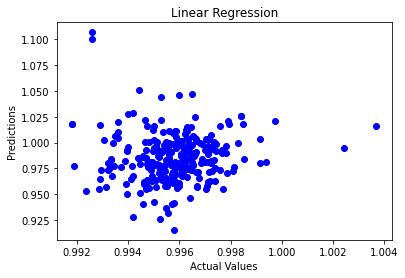

In [1047]:
plt.scatter(Y_test, predicted_y, color = 'blue')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')

LOGISTIC REGRESSION

In [1048]:
data_lg = pd.read_csv('penguins.csv')

Main Statsitics

In [1049]:
peng_stats = data_lg.describe()
peng_head = data_lg.head()
print(peng_head)
print(peng_stats)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%      

In [1050]:
peng_missing_values = data_lg.isnull().sum()
print(peng_missing_values)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


We have found some missing values. So in the columns of type 'numeric' we fill those missing values with the column's mean and in the other columns of type 'categorical' we fill them with the most frequent value .i.e mode.

In [1051]:
data_lg['bill_depth_mm'] = data_lg['bill_depth_mm'].fillna(data_lg['bill_depth_mm'].mean())
data_lg['bill_length_mm'] = data_lg['bill_length_mm'].fillna(data_lg['bill_length_mm'].mean())
data_lg['flipper_length_mm'] = data_lg['flipper_length_mm'].fillna(data_lg['flipper_length_mm'].mean())
data_lg['body_mass_g'] = data_lg['body_mass_g'].fillna(data_lg['bill_depth_mm'].mean())
data_lg['sex'] = data_lg['sex'].fillna(data_lg['sex'].mode().iloc[0])


In [1052]:
mv_after_handling = data_lg.isnull().sum()
print(mv_after_handling)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


Finally we have no missing values after handling them. Now we convert features with 'string' datatype to 'categorical'.

In [1053]:
data_lg['species'] = data_lg['species'].astype('category').cat.codes.astype(int)
data_lg['island'] = data_lg['island'].astype('category').cat.codes.astype(int)
data_lg['sex'] = data_lg['sex'].astype('category').cat.codes.astype(int)
print(data_lg['species'].iloc[340])

1


In [1054]:
data_lg['species'].value_counts()

0    152
2    124
1     68
Name: species, dtype: int64

In [1055]:
data_lg['island'].value_counts()

0    168
1    124
2     52
Name: island, dtype: int64

In [1056]:
data_lg['sex'].value_counts()

1    179
0    165
Name: sex, dtype: int64

Normalizing non-categorical features

In [1057]:
columns_to_normalize = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species', 'island', 'year']
for col in columns_to_normalize:
    data_lg[col] = (data_lg[col] - np.mean(data_lg[col], axis = 0))/np.std(data_lg[col], axis = 0)
    

In [1058]:
data_lg = data_lg.drop('year', axis = 1)

In [1059]:
X_lg = data_lg.drop('sex', axis=1)
Y_lg = data_lg['sex']

In [1060]:
split_size = 0.2
X_lg_train = X_lg[:int(len(X_lg) * (1 - split_size))]
X_lg_test = X_lg[int(len(X_lg) * (1 - split_size)):]
Y_lg_train = Y_lg[:int(len(Y_lg) * (1 - split_size))]
Y_lg_test = Y_lg[int(len(Y_lg) * (1 - split_size)):]
print(X_lg_train.shape, Y_lg_train.shape, X_lg_test.shape, Y_lg_test.shape)
print(X_lg_train.dtypes)

(275, 6) (275,) (69, 6) (69,)
species              float64
island               float64
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
dtype: object


In [1061]:
class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    def fit(self, X, Y):
        self.weights =  np.zeros(X.shape[1])
        self.costs = []
        for i in range(self.iterations):
            self.gradient_descent(X, Y, self.weights, self.learning_rate)
            y_pred = self.sigmoid(X.dot(self.weights))
            self.costs.append(self.cost(y_pred, Y))
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def cost(self, y_pred, Y):
        return (-Y * np.log(y_pred) - (1 - Y) * np.log(1 - y_pred)).mean()
    def gradient_descent(self, X, Y, weights, learning_rate):
        z = X.dot(self.weights)
        y_pred = self.sigmoid(z)
        gradient = X.transpose().dot(y_pred-Y)
        self.weights = self.weights - ((learning_rate * gradient)/Y.shape[0])
        # weights = 1/len(Y)
        return weights, y_pred
    def predict(self, X):
        z = np.dot(X, self.weights)
        z_sigmoid = self.sigmoid(z)
        print(self.weights)
        return (z_sigmoid >= 0.5).astype(int)


In [1062]:
model = LogisticRegression(learning_rate=1e-6, iterations=100000)
model.fit(X_lg_train, Y_lg_train)

In [1063]:
predicted_y_lg = model.predict(X_lg_test)
predicted_y_lg

species              0.000109
island               0.000536
bill_length_mm       0.014438
bill_depth_mm        0.017086
flipper_length_mm    0.011074
body_mass_g          0.018358
dtype: float64


array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1])

In [1064]:
accuracy_hp1 = np.mean(predicted_y_lg == Y_lg_test)
print('Accuracy:', accuracy_hp1)

Accuracy: 0.855072463768116


Text(0.5, 1.0, 'learning_rate = 1e-6')

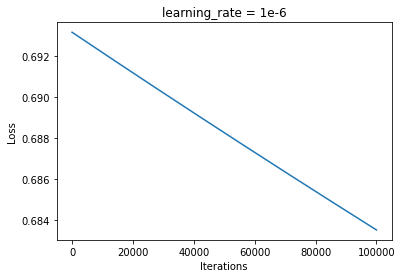

In [1065]:
plt.plot(model.costs)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('learning_rate = 1e-6')

In [1066]:
model1 = LogisticRegression(learning_rate=1e-5, iterations=100000)
model1.fit(X_lg_train, Y_lg_train)

In [1067]:
predicted_y_lg_hp2 = model1.predict(X_lg_test)
predicted_y_lg_hp2

species             -0.017035
island               0.015439
bill_length_mm       0.119848
bill_depth_mm        0.171385
flipper_length_mm    0.086283
body_mass_g          0.154751
dtype: float64


array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1])

In [1068]:
accuracy_hp2 = np.mean(predicted_y_lg_hp2 == Y_lg_test)
print('Accuracy:', accuracy_hp2)

Accuracy: 0.8405797101449275


Text(0.5, 1.0, 'learning_rate = 1e-5')

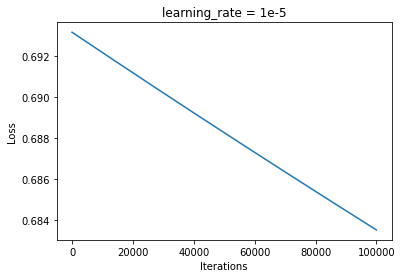

In [1069]:
plt.plot(model.costs)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('learning_rate = 1e-5')

In [1070]:
model2 = LogisticRegression(learning_rate=1e-3, iterations=100000)
model2.fit(X_lg_train, Y_lg_train)

In [1071]:
predicted_y_lg_hp3 = model2.predict(X_lg_test)
predicted_y_lg_hp3

species             -0.926911
island              -0.033776
bill_length_mm       1.143977
bill_depth_mm        2.075361
flipper_length_mm    0.763177
body_mass_g          1.500024
dtype: float64


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1])

In [1072]:
accuracy_hp3 = np.mean(predicted_y_lg_hp3 == Y_lg_test)
print('Accuracy:', accuracy_hp3)

Accuracy: 0.7971014492753623


Text(0.5, 1.0, 'learning_rate = 1e-3')

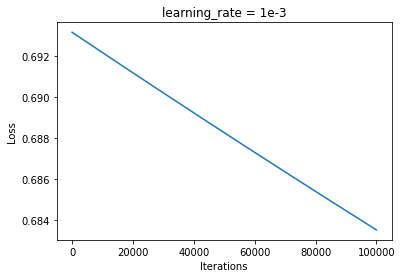

In [1073]:
plt.plot(model.costs)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('learning_rate = 1e-3')